In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding="latin-1")

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


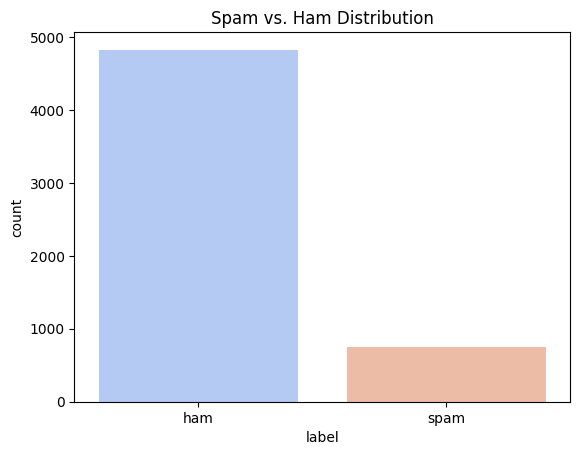

,count
label,
ham,4825
spam,747


In [ ]:
sns.countplot(x=df["label"], palette="coolwarm")
plt.title("Spam vs. Ham Distribution")
plt.show()

df["label"].value_counts()


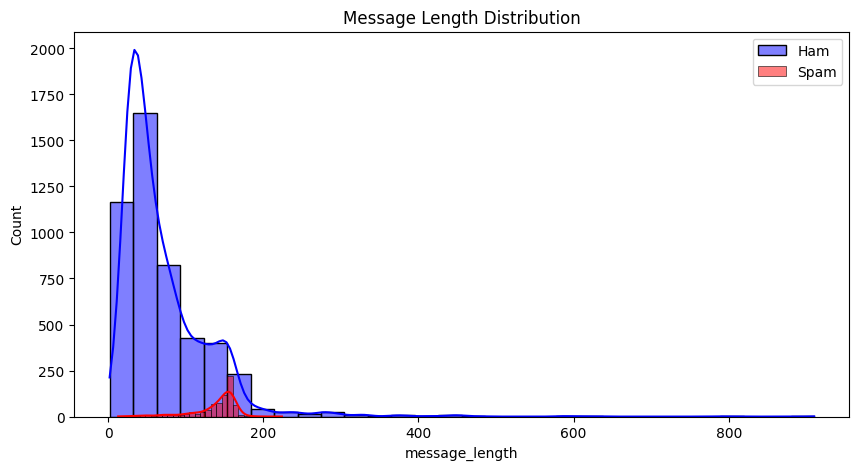

In [ ]:
df["message_length"] = df["message"].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df[df["label"] == "ham"]["message_length"], bins=30, label="Ham", kde=True, color="blue")
sns.histplot(df[df["label"] == "spam"]["message_length"], bins=30, label="Spam", kde=True, color="red")
plt.legend()
plt.title("Message Length Distribution")
plt.show()


In [ ]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})


In [ ]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

df["cleaned_message"] = df["message"].apply(clean_text)
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,label,message,message_length,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think go usf life around though


In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)  # Convert text into numerical vectors
X = vectorizer.fit_transform(df["cleaned_message"])
y = df["label"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print(X_train)

  (0, 1252)	0.6035974991349279
  (0, 2127)	0.7972891941059158
  (1, 4713)	0.4461331771756157
  (1, 4675)	0.5529770022221102
  (1, 1303)	0.4351988720689512
  (1, 4522)	0.5529770022221102
  (2, 2164)	0.2883953713944715
  (2, 179)	0.506089017246747
  (2, 1661)	0.5007772179417764
  (2, 3303)	0.6402532267556027
  (3, 856)	0.39055380958366104
  (3, 844)	0.300877048883738
  (3, 673)	0.3394230201527607
  (3, 3570)	0.3530974210785009
  (3, 1353)	0.28102082855522414
  (3, 4679)	0.3084986210725687
  (3, 211)	0.30267096107127234
  (3, 4710)	0.32574861922702053
  (3, 21)	0.3810367029606643
  (4, 4727)	0.4371879041652228
  (4, 1088)	0.5796243593865178
  (4, 3426)	0.4726357163860058
  (4, 4911)	0.4995175853297618
  (5, 2904)	0.42486846456506966
  (5, 3426)	0.3852510691482007
  :	:
  (4455, 3586)	0.2664267266158778
  (4455, 506)	0.21421595800786902
  (4455, 3766)	0.20575277091518387
  (4455, 1222)	0.13418114242186735
  (4455, 2640)	0.22298983586914659
  (4455, 4560)	0.23309054150866287
  (4455, 785)	0

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



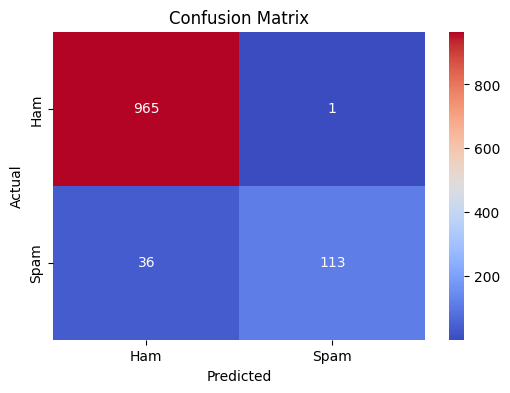

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
def predict_spam(text):
    text = clean_text(text)  # Preprocess
    text_vectorized = vectorizer.transform([text])  # Convert to TF-IDF
    prediction = model.predict(text_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example Messages
new_messages = ["Congratulations! You've won a free trip!", "Let's meet tomorrow for lunch.", "Claim your free prize now!"]
for msg in new_messages:
    print(f"Message: '{msg}' --> Prediction: {predict_spam(msg)}")


Message: 'Congratulations! You've won a free trip!' --> Prediction: Ham
Message: 'Let's meet tomorrow for lunch.' --> Prediction: Ham
Message: 'Claim your free prize now!' --> Prediction: Spam


In [ ]:
df["label"].value_counts()


,count
label,
0,4825
1,747


In [ ]:
pip install imbalanced-learn


**Method 1**
Oversampling (SMOTE – Synthetic Minority Over-sampling Technique)



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
pd.Series(y_resampled).value_counts()


,count
label,
0,4825
1,4825


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9782383419689119

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       965
           1       0.97      0.99      0.98       965

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930



In [ ]:
def predict_spam(text):
    text = clean_text(text)  # Preprocess
    text_vectorized = vectorizer.transform([text])  # Convert to TF-IDF
    prediction = model.predict(text_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example Messages
new_messages = ["Congratulations! You've won a free trip!", "Let's meet tomorrow for lunch.", "Claim your free prize now!"]
for msg in new_messages:
    print(f"Message: '{msg}' --> Prediction: {predict_spam(msg)}")

Message: 'Congratulations! You've won a free trip!' --> Prediction: Spam
Message: 'Let's meet tomorrow for lunch.' --> Prediction: Ham
Message: 'Claim your free prize now!' --> Prediction: Spam


**Method 2**
Undersampling (Random Undersampling of the Majority Class)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check new class distribution
pd.Series(y_resampled).value_counts()


,count
label,
0,747
1,747


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9331103678929766

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       150
           1       0.92      0.95      0.93       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



In [ ]:
def predict_spam(text):
    text = clean_text(text)  # Preprocess
    text_vectorized = vectorizer.transform([text])  # Convert to TF-IDF
    prediction = model.predict(text_vectorized)
    return "Spam" if prediction[0] == 1 else "Ham"

# Example Messages
new_messages = ["Congratulations! You've won a free trip!", "Let's meet tomorrow for lunch.", "Claim your free prize now!"]
for msg in new_messages:
    print(f"Message: '{msg}' --> Prediction: {predict_spam(msg)}")

Message: 'Congratulations! You've won a free trip!' --> Prediction: Spam
Message: 'Let's meet tomorrow for lunch.' --> Prediction: Ham
Message: 'Claim your free prize now!' --> Prediction: Spam


In [ ]:
#try out Hybrid Sampling (SMOTE + Undersampling) for Handling Class Imbalance